# DSO105 Intermediate Statistics L4 Hands On Part 2 - Py

In [3]:
## packages
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [4]:
## data
data = pd.read_excel('../Data/Oranges.xlsx')

In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,NewYork
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,NewYork
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,NewYork
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,NewYork
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,NewYork


## Question: Does the total volume of Orange sold differ between Chicago, Tulsa, and PhoenixTuscon?

In [6]:
regions = ["Chicago", "Tulsa", "PhoenixTucson"]

In [7]:
data1 = data["region"].isin(regions)

In [8]:
data2 = data[data1].copy()

In [9]:
data2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago


In [10]:
data2.region.value_counts()

Chicago          676
Tulsa            338
PhoenixTucson    338
Name: region, dtype: int64

### recode categorical variable

In [11]:
dict = {'Chicago' : 0, 'Tulsa' : 1, 'PhoenixTucson' : 2}

In [12]:
data2['region'] = data2.region.replace(dict)

In [13]:
data2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,0
417,1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,0
418,2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,0
419,3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,0
420,4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,0


In [14]:
data2.region.value_counts()

0    676
1    338
2    338
Name: region, dtype: int64

### Assumptions
#### Normality

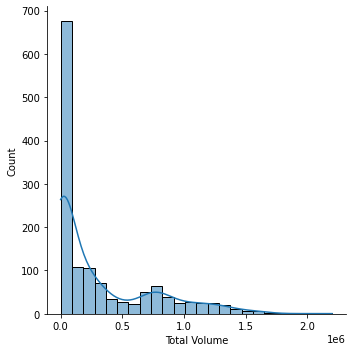

In [15]:
sns.displot(data2['Total Volume'], kde = True)
## positively skewed

In [16]:
data2['TVsqrt'] = np.sqrt(data2['Total Volume'])
## take square root to transform for a possible correction

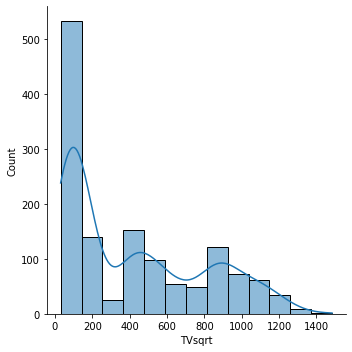

In [17]:
sns.displot(data2['TVsqrt'], kde = True)
## does not really make the total volume more approx. normally distributed - try log

In [18]:
data2['TVlog'] = np.log(data2['Total Volume'])
## take log to transform for a possible correction

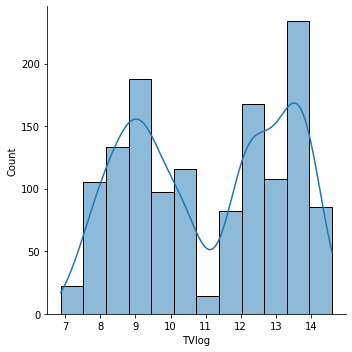

In [19]:
sns.displot(data2['TVlog'], kde = True)
## The is perhaps best - though it does not really look approx normal

#### Homogeneity of Variance

In [20]:
scipy.stats.bartlett(data2["TVlog"], data2["region"])

BartlettResult(statistic=1077.3265105227972, pvalue=2.7982391772690326e-236)

#### ANOVA

In [21]:
stats.f_oneway(data["Total Volume"][data["region"]=='Chicago'],
                    data["Total Volume"][data["region"]=='Tulsa'],
                    data["Total Volume"][data["region"]=='PhoenixTucson'])
## appears to be significant difference with that p-value

F_onewayResult(statistic=113.93238429731466, pvalue=1.9085500198123594e-46)

#### Interpret Results

In [22]:
postHoc = MultiComparison(data2["TVlog"], data2["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)
## reject the null hypothesis for all

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.4418 0.0051 -0.7734 -0.1102   True
     0      2   0.6056 0.0001   0.274  0.9372   True
     1      2   1.0474    0.0  0.6645  1.4303   True
----------------------------------------------------


In [23]:
data3 = data2[['region', 'Total Volume']]

In [24]:
data3.groupby("region").mean()

,Total Volume
region,
0,242552.854941
1,173552.378373
2,578826.368343


## __PhoenixTucson has the highest total volume, with Chicago having the least total volume of the three.__